# Analyse des correspondances multiples (ACM)

L'analyse des correspondances multiples (ACM) est une extension de l'analyse des correspondances (CA). Il doit être utilisé lorsque vous avez plus de deux variables catégorielles. L'idée est simplement de calculer la version encodée à chaud d'un ensemble de données et d'y appliquer CA. À titre d'exemple, nous allons utiliser le jeu de données [Balloons tiré](https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/) du site Web des jeux de données UCI.

## Les types de données utilisées pour l'ACM

decrivons d'abord à quel tableau s'applique l'**analyse des correspondances multiples(ACM)**:
l'**ACM** s'applique aux tableaux rectanglaire avec J le nombre de variables qualitatives 
, I le nombre d'observations ou encore le nombre d'individus et 
xij : modalité de la variable où I personne sont intérogées sur J questions à choix 
multiples.

## Description de notre dataset

nous avons appliquées notre ACM sur une base de donnée qui contient 8 portraits robots
avec les variables suivantes: 
1. **lunettes**(a:absence, A: presence), 
2. **cheveux**(b:courts, B: longs), 
3. **barbe**(c: absence, C: longues, k: daltonien), 
4. **mouchetache**(d: abasence,D:petite, m:moyenne, T: grosse) 

![dataset robo](db.png)

## Objectif

les objectifs de l'analyse des correspondandances multiples sur un tel tableau est d'étudier la variabilité  et la ressemblance entre individu
c'est à dire determiné les individus qui se ressemblent et ceux qui ont des caractéristiques différents dans une base de données  

## Cas pratique en Python

### Importation des packages ou librairies

In [1]:
## on importe le package pandas pour l'importation des données(datasets)
import pandas as pd
## importation du package prince
import prince as pr

### Chargement des données (datasets)

In [2]:
## on va charger notre dataset ACM.xlsx le fichier qui contient nos données avec la méthode read_excel() de pandas
df = pd.read_excel('ACM.xlsx')
## on va afficher les 4 premières lignes de notre dataset
df.head()

,Lunette,Cheveux,Barbe,Moustache
0,a,b,c,d
1,a,b,c,d
2,A,b,c,d
3,a,B,c,D
4,A,B,c,D


## Statistique sur notre datasets avec la méthode describe()

In [3]:
df.describe()

,Lunette,Cheveux,Barbe,Moustache
count,8,8,8,8
unique,2,2,3,4
top,a,B,c,d
freq,5,5,5,3


Comme notre base de donnée ne contient que des données qualitatives nous n'avons ni la moyenne, ni la median, ni la variance,...., par contre nous avons:
* le nombre total de ligne qui est dans notre cas **8 ligne**, 
* élément unique
  **Lunette**: 2
  **Cheveux**: 2
  **Barbe**: 3
  **Moustache**: 4
* élément le plus fréquent
   **Lunette**: a nombre 5
   **Cheveux**: B nombre 5
   **Barbe**: c nombre 5
   **Moustache**: d nombre 3

## Le ACM implémente également les méthodes fit et de transform.

In [22]:
acm = pr.MCA(
     n_components=4,
     n_iter=10,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
)
acm = acm.fit(df)

In [23]:
acm

MCA(n_components=4, random_state=42)

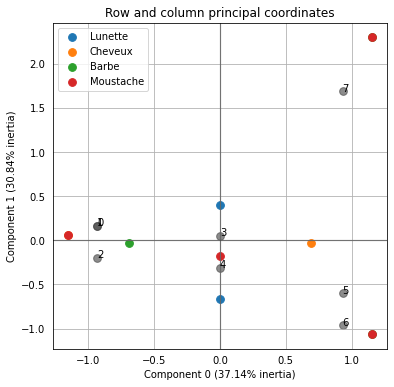

In [24]:
ax = acm.plot_coordinates(
     X=df,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=60,
     show_row_labels=True,
     show_column_points=True,
     column_points_size=60,
     show_column_labels=False,
     legend_n_cols=1
)
ax.get_figure().savefig('images/coordonnees_acm.svg')

## Pour visualiser les coordonnées des différents points

In [21]:
acm.U_

array([[-4.08248290e-01,  7.89819222e-02, -2.44086424e-01,
        -2.06196525e-01],
       [-4.08248290e-01,  7.89819222e-02, -2.44086424e-01,
        -2.06196525e-01],
       [-4.08248290e-01, -9.58131497e-02, -1.08343009e-01,
         5.36110964e-01],
       [ 4.01307252e-17,  2.52468413e-02,  5.28644150e-01,
        -4.94871659e-01],
       [-4.50400294e-16, -1.49548231e-01,  6.64387565e-01,
         2.47435830e-01],
       [ 4.08248290e-01, -2.87439449e-01, -3.25029028e-01,
        -4.12393049e-01],
       [ 4.08248290e-01, -4.62234521e-01, -1.89285613e-01,
         3.29914440e-01],
       [ 4.08248290e-01,  8.11824665e-01, -8.22012163e-02,
         2.06196525e-01]])

en ACM, on a la notion de tableau dijonctif complet qui signifie que dans chaque modalité on veut qu'une seule fois un(1) cet un obligatoire

## Interpretation de nos résultats

* D'après notre graphique, nous voyons que les les personnes 0, 1, 2 sont très proches alors c'est le groupes des gens qui n'ont ni ni barbe, ni lunette, et ont très peu de cheveux
* les personnes 3 et 4 sont également très proches donc se sont des personnes, ce sont des personnes qui n'ont pas de barbures, qui plus de cheveux et de moustache 
* les personnes 5 et 6 ont quelques points de convergences à savoir: ils ont beaucoup de cheveux et de moustaches mais il n'ont pas de barbures
* et enfin la personne 7 est une personne extrème car  il a trop de moustache et beaucoup de moustache, il n'a pas ni lunette

## Résumé

l'ACM étudie des tableaux individus x variables qualitatives
A partir d'un petit tableau, l'ACM met en évidence les éléments de cette façon hiérarchisée

## Ressources

1. https://www.youtube.com/watch?v=bihScz3OXbw&ab_channel=Fran%C3%A7oisHusson
2. https://archive.ics.uci.edu/ml/machine-learning-databases/
3. https://github.com/MaxHalford/Prince
4. https://pypi.org/project/prince/#correspondence-analysis-ca
5. http://statmath.wu.ac.at/courses/CAandRelMeth/caipA.pdf